Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import nltk
import re
import string

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

import keras
from keras.preprocessing import text,sequence
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

Data reading

In [ ]:
df_fake = pd.read_csv('Fake.csv')

In [ ]:
df_fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,31-Dec-17
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,31-Dec-17
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,30-Dec-17
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,29-Dec-17
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,25-Dec-17


In [ ]:
df_fake.shape

(22800, 4)

In [ ]:
df_true = pd.read_csv('True.csv')


In [ ]:
df_true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [ ]:
df_true.shape

(21417, 4)

Data preprocessing


In [ ]:
#add column
df_fake['target']= 0
df_true['target'] = 1

In [ ]:
df_fake

,title,text,subject,date,target
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,31-Dec-17,0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,31-Dec-17,0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,30-Dec-17,0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,29-Dec-17,0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,25-Dec-17,0
...,...,...,...,...,...
22795,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,16-Jan-16,0
22796,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,16-Jan-16,0
22797,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,15-Jan-16,0
22798,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,14-Jan-16,0


In [ ]:
df_true

,title,text,subject,date,target
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1
...,...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1


In [ ]:
#merging two data sets as one
data = pd.concat([df_fake,df_true],axis = 0)
data.head()

,title,text,subject,date,target
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,31-Dec-17,0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,31-Dec-17,0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,30-Dec-17,0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,29-Dec-17,0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,25-Dec-17,0


In [ ]:
duplicates = data.duplicated()


In [ ]:
duplicates.sum()

209

In [ ]:
data.drop_duplicates()

,title,text,subject,date,target
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,31-Dec-17,0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,31-Dec-17,0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,30-Dec-17,0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,29-Dec-17,0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,25-Dec-17,0
...,...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1


In [ ]:
data.isnull().sum()

title      0
text       0
subject    0
date       0
target     0
dtype: int64

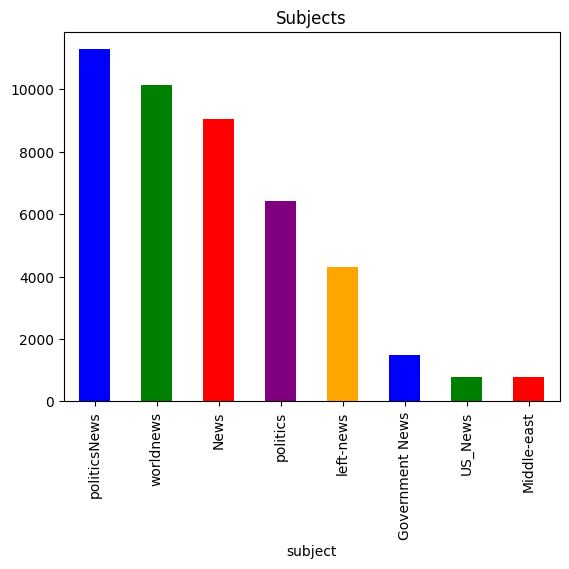

In [ ]:
#visualizing different kind of news
subject =data['subject']
subject_count = subject.value_counts()
colors = ['blue', 'green', 'red', 'purple', 'orange']
subject_count.plot(kind='bar',color =colors)
plt.title('Subjects')
plt.show()

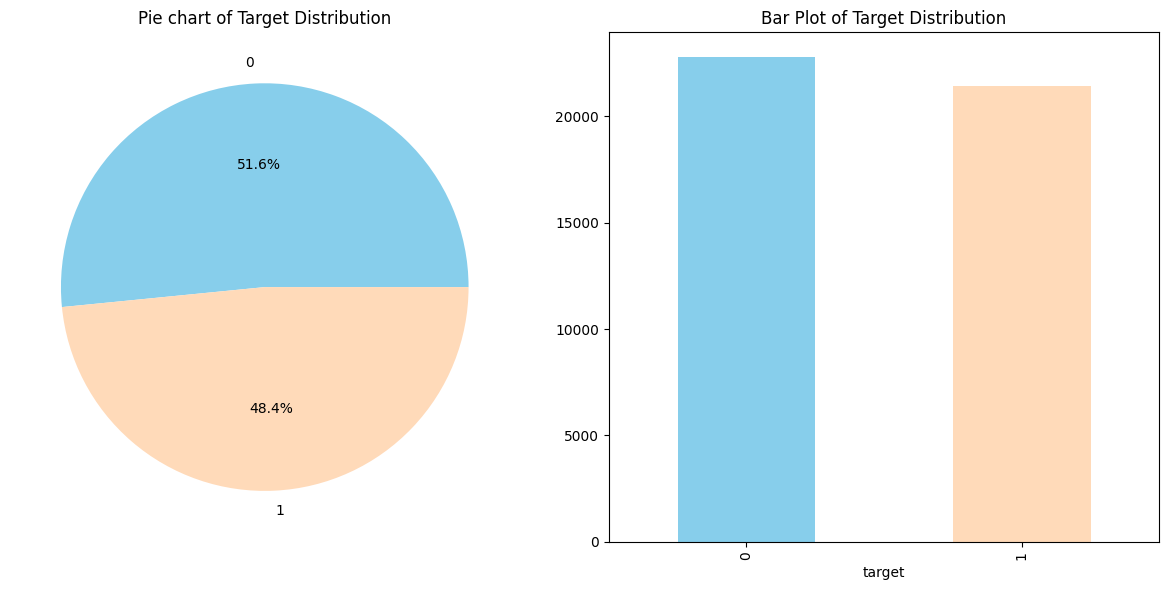

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
target_count = data['target'].value_counts()
colors = ['skyblue', 'peachpuff']
plt.pie(target_count, labels=target_count.index, colors=colors, autopct='%1.1f%%')
plt.title('Pie chart of Target Distribution')

# Bar plot
plt.subplot(1, 2, 2)
colors = ['skyblue', 'peachpuff']
target_count.plot(kind='bar', color=colors)
plt.title('Bar Plot of Target Distribution')

plt.tight_layout()
plt.show()


subject
politicsNews       11272
worldnews          10145
News                9048
politics            6411
left-news           4302
Government News     1495
US_News              774
Middle-east          770
Name: count, dtype: int64


Text(0.5, 1.0, 'Distribution of The Subject According to Real and Fake Data')

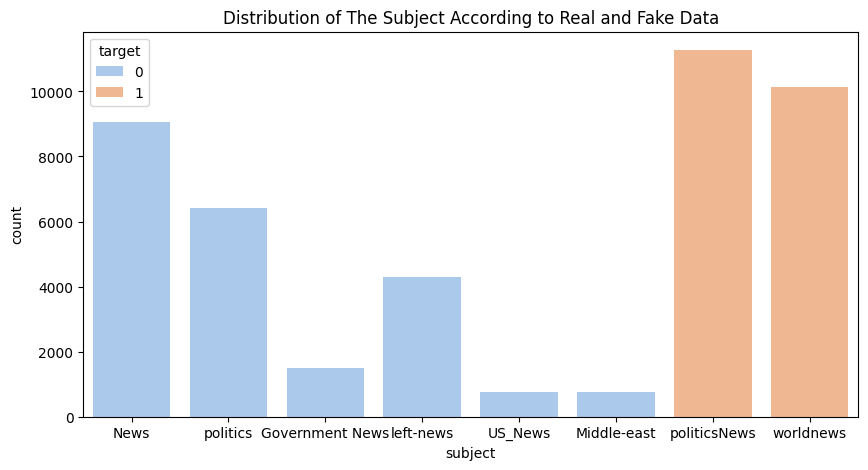

In [ ]:
print(data.subject.value_counts())
plt.figure(figsize=(10, 5))

ax = sns.countplot(x="subject",  hue='target', data=data, palette="pastel")
plt.title("Distribution of The Subject According to Real and Fake Data")

Data cleaning

In [ ]:
data= data.drop(['subject','title','date'],axis=1)

In [ ]:
data = data.sample(frac=1)

In [ ]:
data.head()

,text,target
17198,Wow! What a couple of hypocrites and haters! W...,0
21261,ACR s BOILER ROOM presents a Christmas poem Tw...,0
15673,Russian President Vladimir Putin got sassy wit...,0
4978,"You ve probably seen the headlines that Aetna,...",0
8520,Thanks to a repeal of a long-standing law in 2...,0


In [ ]:
data.reset_index(inplace=True)
data.drop(['index'], axis = 1 ,inplace=True)

In [ ]:
data.columns

Index(['text', 'target'], dtype='object')

In [ ]:
import warnings
warnings.filterwarnings("ignore")
import re
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Initialize WordNet Lemmatizer
lemmatizer = WordNetLemmatizer()

# Define function for preprocessing
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()

    # Replace URLs with 'URL'
    text = re.sub(r'http\S+|www\S+|https\S+', 'URL', text)

    # Define dictionary for emoji replacement
    emojis = {':)': 'EMOJIsmile', ':(': 'EMOJIsad', ':D': 'EMOJIlaugh', ':|': 'EMOJIneutral', ':O': 'EMOJIshock', ';)': 'EMOJIwink', ':*': 'EMOJIkiss', '<3': 'EMOJIheart', ':P': 'EMOJItongue'}


    # Replace emojis
    for emoji, meaning in emojis.items():
        text = text.replace(emoji, ' ' + meaning + ' ')

    # Replace usernames with 'USER'
    text = re.sub(r'@[\w_]+', 'USER', text)

    # Remove non-alphabetic characters
    text = re.sub(r'[^a-zA-Z\s]', ' ', text)

    # Remove consecutive letters
    text = re.sub(r'(.)\1{2,}', r'\1\1', text)

    # Tokenize text
    tokens = word_tokenize(text)

    # Remove short words
    tokens = [word for word in tokens if len(word) > 1]

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    # Lemmatize words
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    # Join tokens back into text
    preprocessed_text = ' '.join(tokens)

    return preprocessed_text




data['preprocessed_text'] = data['text'].apply(preprocess_text)





[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
data.head()

,text,target,preprocessed_text
0,Wow! What a couple of hypocrites and haters! W...,0,wow couple hypocrite hater included contact in...
1,ACR s BOILER ROOM presents a Christmas poem Tw...,0,acr boiler room present christmas poem twas ni...
2,Russian President Vladimir Putin got sassy wit...,0,russian president vladimir putin got sassy pre...
3,"You ve probably seen the headlines that Aetna,...",0,probably seen headline aetna one largest provi...
4,Thanks to a repeal of a long-standing law in 2...,0,thanks repeal long standing law kansa currentl...


Dropping text column and renaming preprocessed_text as text

In [ ]:
data= data.drop(['text'],axis=1)
data = data.rename(columns={'preprocessed_text': 'text'})


In [ ]:
data.head()

,target,text
0,0,kara young biracial model dated donald trump b...
1,0,another day holy month ramadan london scene ca...
2,1,washington reuters president barack obama fren...
3,1,san antonio reuters mayor south texas town cry...
4,1,brussels reuters european commission president...


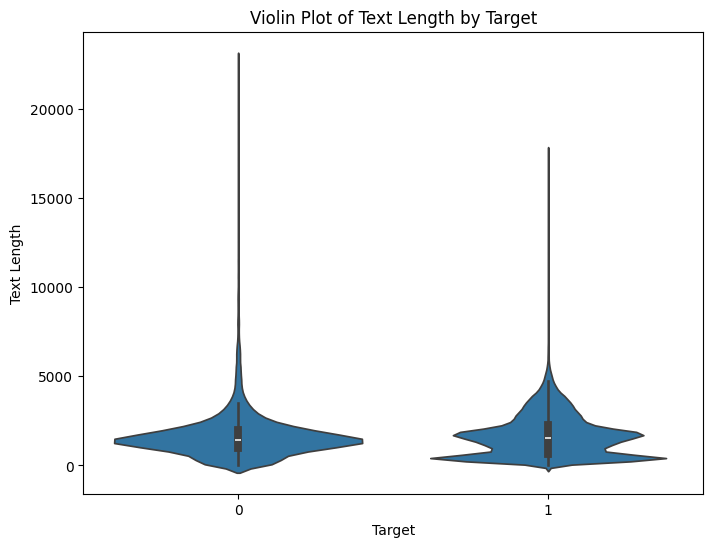

In [ ]:
# Violin plot
plt.figure(figsize=(8, 6))
sns.violinplot(x='target', y=data['text'].apply(len), data=data)
plt.xlabel('Target')
plt.ylabel('Text Length')
plt.title('Violin Plot of Text Length by Target')
plt.show()


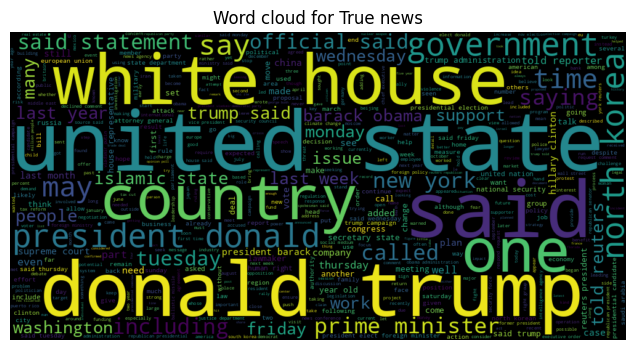

In [ ]:
from wordcloud import WordCloud,STOPWORDS
real_text = ''.join(data[data.target ==1].text)
wordcloud_real  = WordCloud(max_words = 500 , width = 1000 , height = 500 , stopwords = STOPWORDS)
wordcloud_real.generate(real_text)
plt.figure(figsize=(8,4))
plt.imshow(wordcloud_real, interpolation = 'bilinear')
plt.title('Word cloud for True news')
plt.axis('off')
plt.show()


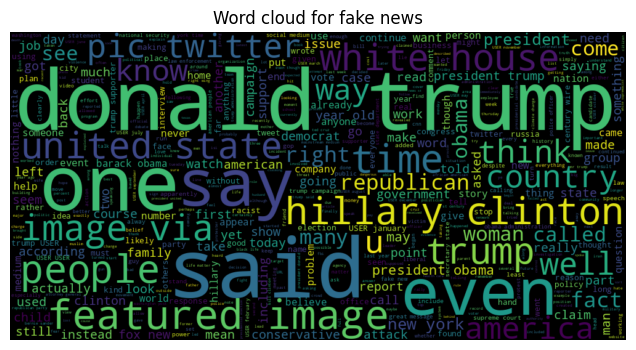

In [ ]:
from wordcloud import WordCloud,STOPWORDS
fake_text = ''.join(data[data.target ==0].text)
wordcloud_fake  = WordCloud(max_words = 500 , width = 1000 , height = 500 , stopwords = STOPWORDS)
wordcloud_real.generate(fake_text)
plt.figure(figsize=(8,4))
plt.imshow(wordcloud_real, interpolation = 'bilinear')
plt.title('Word cloud for fake news')
plt.axis('off')
plt.show()

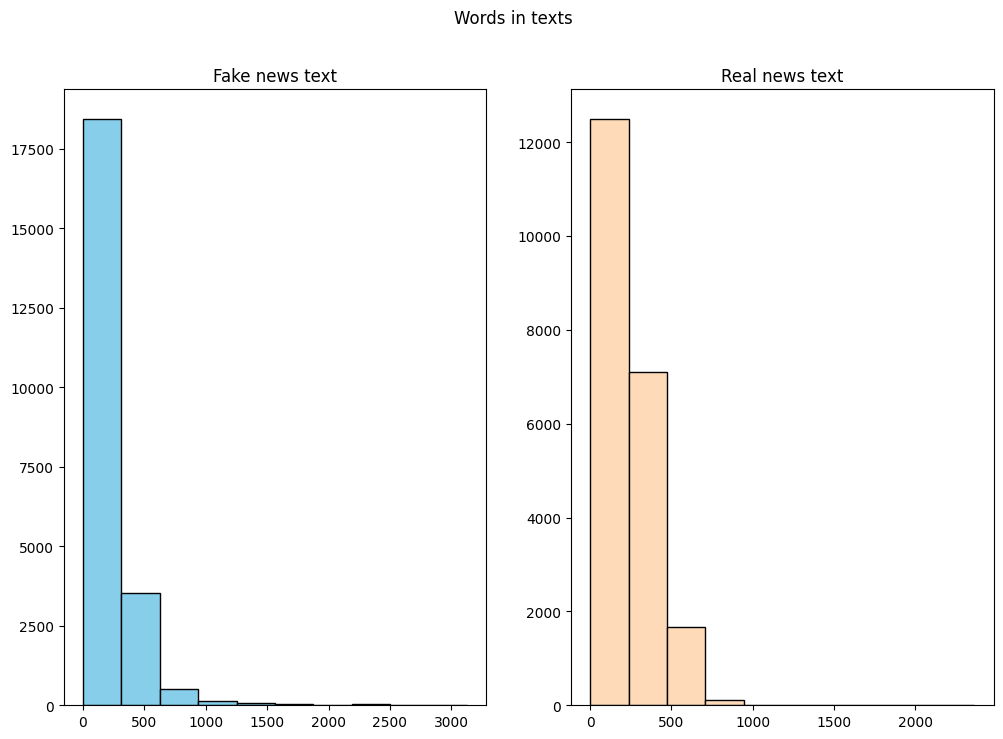

In [ ]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,8))
text_len=data[data['target']==0]['text'].str.split().map(len)
ax1.hist(text_len,color='SkyBlue',edgecolor='black')
ax1.set_title('Fake news text')
text_len=data[data['target']==1]['text'].str.split().map(len)
ax2.hist(text_len,color='PeachPuff',edgecolor='black')
ax2.set_title('Real news text')
fig.suptitle('Words in texts')
plt.show()

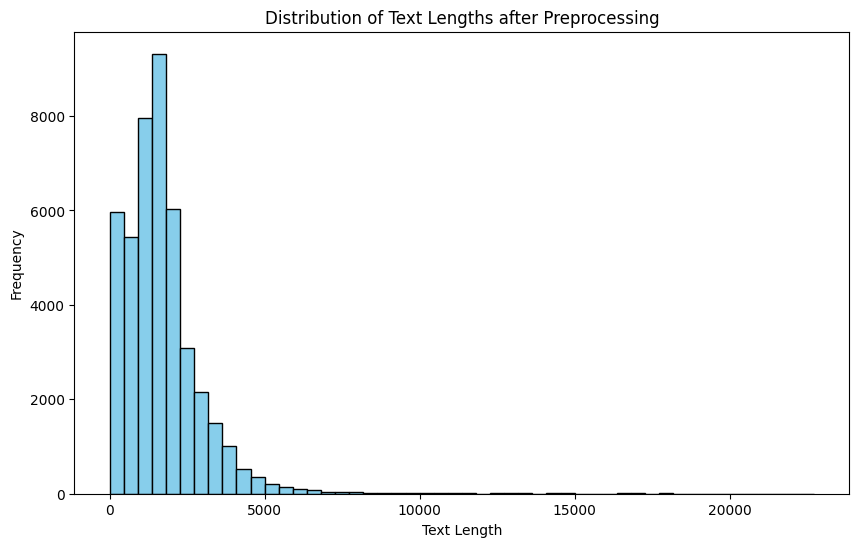

In [ ]:
data['text_length'] = data['text'].apply(lambda x: len(x))

# Plot histogram of text lengths
plt.figure(figsize=(10, 6))
plt.hist(data['text_length'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Text Lengths after Preprocessing')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()


Data modeling

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer


X = data['text']
y = data['target']


X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)



In [ ]:
from sklearn.model_selection import RandomizedSearchCV
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc
import time

def train_and_evaluate(classifier_name, param_dist, iterations):
    all_results = []
    for n_iter in iterations:
        start_time = time.time()
        clf = RandomizedSearchCV(classifier_name, param_dist, n_iter=n_iter, cv=10, n_jobs=-1)
        clf.fit(X_train_tfidf, y_train)
        end_time = time.time()
        print(f"Best parameters for {classifier_name} with {n_iter} iterations: {clf.best_params_}")

        # Predictions and accuracy
        y_pred_proba = clf.predict_proba(X_test_tfidf)
        y_pred = clf.predict(X_test_tfidf)
        accuracy = accuracy_score(y_test, y_pred)
        print(f"Accuracy for {classifier_name} with {n_iter} iterations: {accuracy}")
        print(f"Training time for {classifier_name} with {n_iter} iterations: {end_time - start_time} seconds\n")

        # Classification report
        print(classification_report(y_test, y_pred))


        # Append results to the list
        all_results.append({
            'classifier_name': classifier_name.__class__.__name__,
            'n_iter': n_iter,
            'best_params': clf.best_params_,
            'accuracy': accuracy,
            'y_test': y_test,
            'y_pred_proba': y_pred_proba
        })

    return all_results

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
def plot_roc_curves(all_results):
    plt.figure(figsize=(8, 6))
    for result in all_results:
        classifier_name = result['classifier_name']
        n_iter = result['n_iter']
        y_test = result['y_test']
        y_pred_proba = result['y_pred_proba']

        fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:, 1])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{classifier_name} (Iteration {n_iter}, AUC = {roc_auc:.2f})')

    plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curves for Multiple Iterations')
    plt.legend()
    plt.show()




In [ ]:
from sklearn.linear_model import LogisticRegression
from scipy.stats import uniform

param_dist = {
    'penalty': ['l1', 'l2'],
    'C': uniform(loc=0, scale=4),
    'solver': ['liblinear', 'saga'],
}

iterations = [5, 10,15,20 ]
results = train_and_evaluate(LogisticRegression(), param_dist, iterations)



Best parameters for LogisticRegression() with 5 iterations: {'C': 1.1782775586626744, 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy for LogisticRegression() with 5 iterations: 0.9937810945273632
Training time for LogisticRegression() with 5 iterations: 109.82326889038086 seconds

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      4586
           1       0.99      1.00      0.99      4258

    accuracy                           0.99      8844
   macro avg       0.99      0.99      0.99      8844
weighted avg       0.99      0.99      0.99      8844

Best parameters for LogisticRegression() with 10 iterations: {'C': 3.0081248582450746, 'penalty': 'l1', 'solver': 'saga'}
Accuracy for LogisticRegression() with 10 iterations: 0.994572591587517
Training time for LogisticRegression() with 10 iterations: 339.824501991272 seconds

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      4586
 

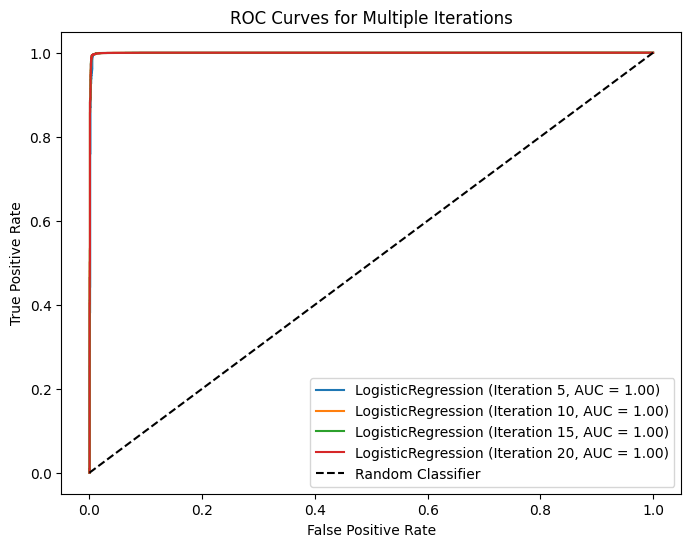

In [ ]:
plot_roc_curves(results)


Best parameters for MultinomialNB() with 5 iterations: {'fit_prior': False, 'class_prior': None, 'alpha': 0.1}
Accuracy for MultinomialNB() with 5 iterations: 0.9323835368611488
Training time for MultinomialNB() with 5 iterations: 4.039846181869507 seconds

              precision    recall  f1-score   support

           0       0.93      0.94      0.94      4586
           1       0.93      0.93      0.93      4258

    accuracy                           0.93      8844
   macro avg       0.93      0.93      0.93      8844
weighted avg       0.93      0.93      0.93      8844

Best parameters for MultinomialNB() with 10 iterations: {'fit_prior': True, 'class_prior': [0.5, 0.5], 'alpha': 0.1}
Accuracy for MultinomialNB() with 10 iterations: 0.9323835368611488
Training time for MultinomialNB() with 10 iterations: 5.198408603668213 seconds

              precision    recall  f1-score   support

           0       0.93      0.94      0.94      4586
           1       0.93      0.93      0

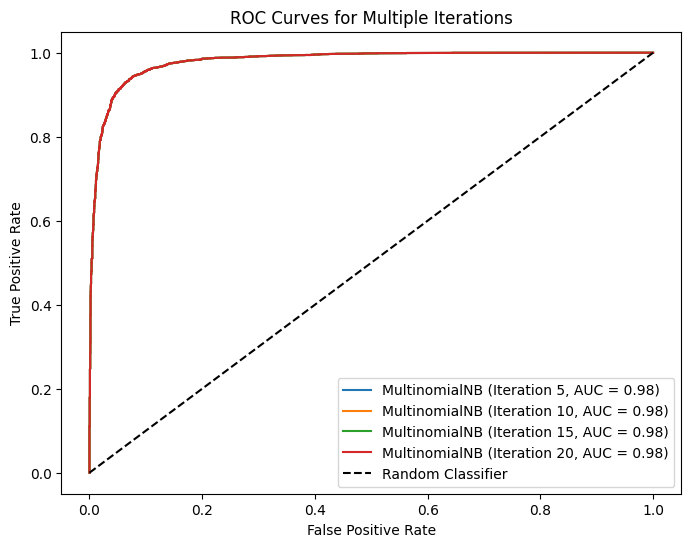

In [ ]:
from sklearn.naive_bayes import MultinomialNB

param_dist = {
    'alpha': [0.1, 0.5, 1.0, 2.0],
    'fit_prior': [True, False],
    'class_prior': [None, [0.2, 0.8], [0.5, 0.5]],

}

iterations = [5, 10,15,20 ]
results = train_and_evaluate(MultinomialNB(), param_dist, iterations)


plot_roc_curves(results)



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint

param_dist = {
    'n_estimators': randint(50, 200),
    'max_features': ['auto', 'sqrt'],
    'max_depth': [10, 20, 30, 40, 50, None],
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 10),
    'bootstrap': [True, False],
}

iterations = [5]
results = train_and_evaluate(RandomForestClassifier(), param_dist, iterations)



Best parameters for RandomForestClassifier() with 5 iterations: {'bootstrap': False, 'max_depth': 40, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 8, 'n_estimators': 182}
Accuracy for RandomForestClassifier() with 5 iterations: 0.9967209407507915
Training time for RandomForestClassifier() with 5 iterations: 2000.8771183490753 seconds

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4586
           1       1.00      1.00      1.00      4258

    accuracy                           1.00      8844
   macro avg       1.00      1.00      1.00      8844
weighted avg       1.00      1.00      1.00      8844



In [ ]:
iterations = [10]
results = train_and_evaluate(RandomForestClassifier(), param_dist, iterations)

Best parameters for RandomForestClassifier() with 10 iterations: {'bootstrap': False, 'max_depth': 40, 'max_features': 'auto', 'min_samples_leaf': 3, 'min_samples_split': 7, 'n_estimators': 158}
Accuracy for RandomForestClassifier() with 10 iterations: 0.9968340117593849
Training time for RandomForestClassifier() with 10 iterations: 3549.00524020195 seconds

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4586
           1       1.00      1.00      1.00      4258

    accuracy                           1.00      8844
   macro avg       1.00      1.00      1.00      8844
weighted avg       1.00      1.00      1.00      8844



In [ ]:
iterations = [15 ]
results = train_and_evaluate(RandomForestClassifier(), param_dist, iterations)

Best parameters for RandomForestClassifier() with 15 iterations: {'bootstrap': True, 'max_depth': 50, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 7, 'n_estimators': 173}
Accuracy for RandomForestClassifier() with 15 iterations: 0.9971732247851651
Training time for RandomForestClassifier() with 15 iterations: 5814.541604757309 seconds

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4586
           1       1.00      1.00      1.00      4258

    accuracy                           1.00      8844
   macro avg       1.00      1.00      1.00      8844
weighted avg       1.00      1.00      1.00      8844



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint

param_dist = {
    'n_estimators': randint(50, 100),
    'max_features': ['auto'],
    'max_depth': [10, None],
    'min_samples_split': randint(2, 6),
    'min_samples_leaf': randint(1, 3),
    'bootstrap': [True],
}

iterations = [20 ]
results = train_and_evaluate(RandomForestClassifier(), param_dist, iterations)

Best parameters for RandomForestClassifier() with 20 iterations: {'bootstrap': True, 'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 93}
Accuracy for RandomForestClassifier() with 20 iterations: 0.9984170058796924
Training time for RandomForestClassifier() with 20 iterations: 3419.681995868683 seconds

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4582
           1       1.00      1.00      1.00      4262

    accuracy                           1.00      8844
   macro avg       1.00      1.00      1.00      8844
weighted avg       1.00      1.00      1.00      8844



In [ ]:
rf_results = [
    {
        'iterations': 5,
        'accuracy': 0.9967209407507915,
        'precision': {'0': 1.00, '1': 1.00},
        'recall': {'0': 1.00, '1': 1.00},
        'f1_score': {'0': 1.00, '1': 1.00}
    },
    {
        'iterations': 10,
        'accuracy': 0.9968340117593849,
        'precision': {'0': 1.00, '1': 1.00},
        'recall': {'0': 1.00, '1': 1.00},
        'f1_score': {'0': 1.00, '1': 1.00}
    },
    {
        'iterations': 15,
        'accuracy': 0.9971732247851651,
        'precision': {'0': 1.00, '1': 1.00},
        'recall': {'0': 1.00, '1': 1.00},
        'f1_score': {'0': 1.00, '1': 1.00}
    },
    {
        'iterations': 20,
        'accuracy': 0.9984170058796924,
        'precision': {'0': 1.00, '1': 1.00},
        'recall': {'0': 1.00, '1': 1.00},
        'f1_score': {'0': 1.00, '1': 1.00}
    }
]


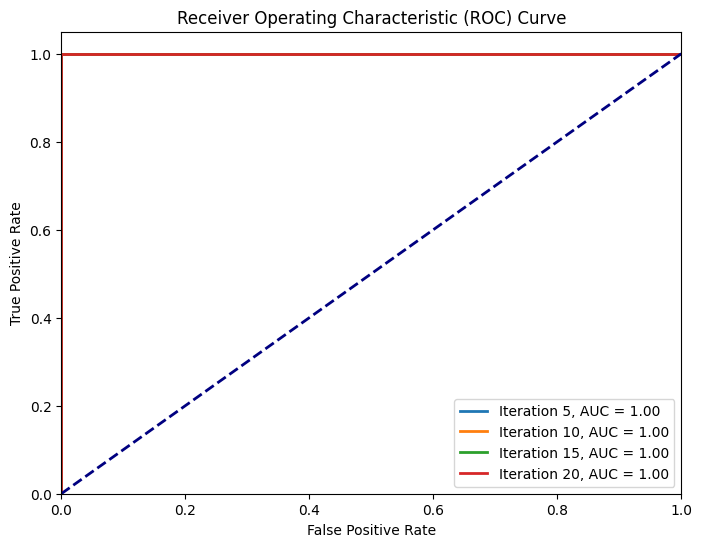

In [ ]:
plt.figure(figsize=(8, 6))

for result in rf_results:
    fpr, tpr, _ = roc_curve([0, 1], [1 - result['recall']['0'], result['recall']['1']])  # Update key access
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label='Iteration {}, AUC = {:.2f}'.format(result['iterations'], roc_auc))  # Update key access

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import LSTM, Dense, Embedding, SpatialDropout1D
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Increase max_len to capture more context
max_len = 150

# Tokenize the text data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(data['text'])
X = tokenizer.texts_to_sequences(data['text'])
X_pad = pad_sequences(X, maxlen=max_len, padding='post')

# Define vocabulary size
num_words = len(tokenizer.word_index) + 1

# Split the data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_pad, data['target'], test_size=0.2, random_state=42)

# Define LSTM model
embedding_dim = 100  # Increased embedding dimension
lstm_units = 150  # Increased number of LSTM units

# List of batch sizes to iterate over
batch_sizes = [32, 64, 128]

# Lists to store metrics for each batch size
train_loss_list = []
val_loss_list = []
train_accuracy_list = []
val_accuracy_list = []

for batch_size in batch_sizes:
    lstm_model = Sequential()
    lstm_model.add(Embedding(input_dim=num_words, output_dim=embedding_dim, input_length=max_len))
    lstm_model.add(SpatialDropout1D(0.4))
    lstm_model.add(LSTM(lstm_units, dropout=0.4, recurrent_dropout=0.4))
    lstm_model.add(Dense(1, activation='sigmoid'))

    # Compile LSTM model
    lstm_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    # Print LSTM model summary
    print("\nLSTM Model Summary for Batch Size:", batch_size)
    lstm_model.summary()

    # Train LSTM model
    history = lstm_model.fit(X_train, y_train, epochs=5, batch_size=batch_size, validation_data=(X_val, y_val))

    # Collecting metrics
    train_loss_list.append(history.history['loss'])
    val_loss_list.append(history.history['val_loss'])
    train_accuracy_list.append(history.history['accuracy'])
    val_accuracy_list.append(history.history['val_accuracy'])

    # Evaluate the model on the validation set
    val_loss, val_accuracy = lstm_model.evaluate(X_val, y_val)
    print("\nValidation Accuracy for Batch Size {}: {}".format(batch_size, val_accuracy))

    # Predict on validation set
    y_pred = (lstm_model.predict(X_val) > 0.5).astype(int)
    print("Validation Accuracy (Binary) for Batch Size {}: {}".format(batch_size, accuracy_score(y_val, y_pred)))

    # Print classification report
    print("Classification Report for Batch Size {}: \n{}".format(batch_size, classification_report(y_val, y_pred)))





LSTM Model Summary for Batch Size: 32
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 150, 100)          9595200   
                                                                 
 spatial_dropout1d (Spatial  (None, 150, 100)          0         
 Dropout1D)                                                      
                                                                 
 lstm (LSTM)                 (None, 150)               150600    
                                                                 
 dense (Dense)               (None, 1)                 151       
                                                                 
Total params: 9745951 (37.18 MB)
Trainable params: 9745951 (37.18 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/5
1106/1106 [======================

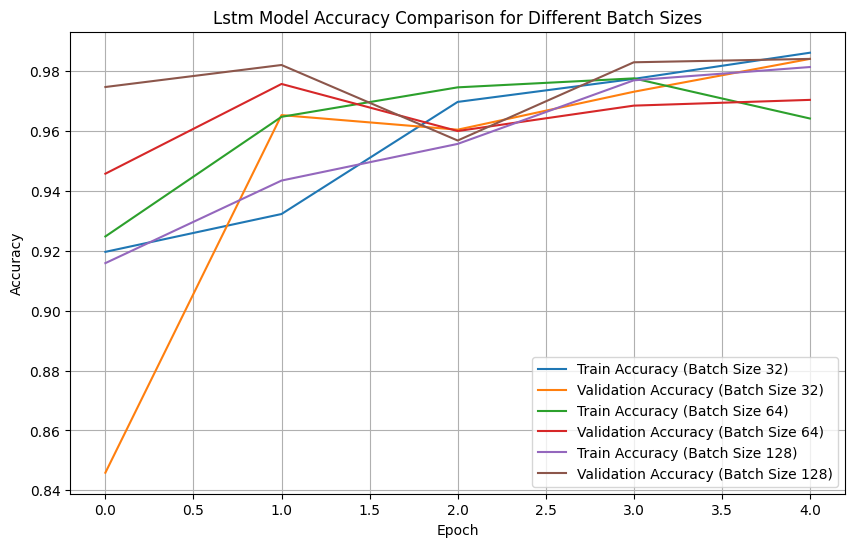

In [ ]:


# Plotting
plt.figure(figsize=(10, 6))

for i, batch_size in enumerate(batch_sizes):
    plt.plot(train_accuracy_list[i], label='Train Accuracy (Batch Size {})'.format(batch_size))
    plt.plot(val_accuracy_list[i], label='Validation Accuracy (Batch Size {})'.format(batch_size))

plt.title('Lstm Model Accuracy Comparison for Different Batch Sizes')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


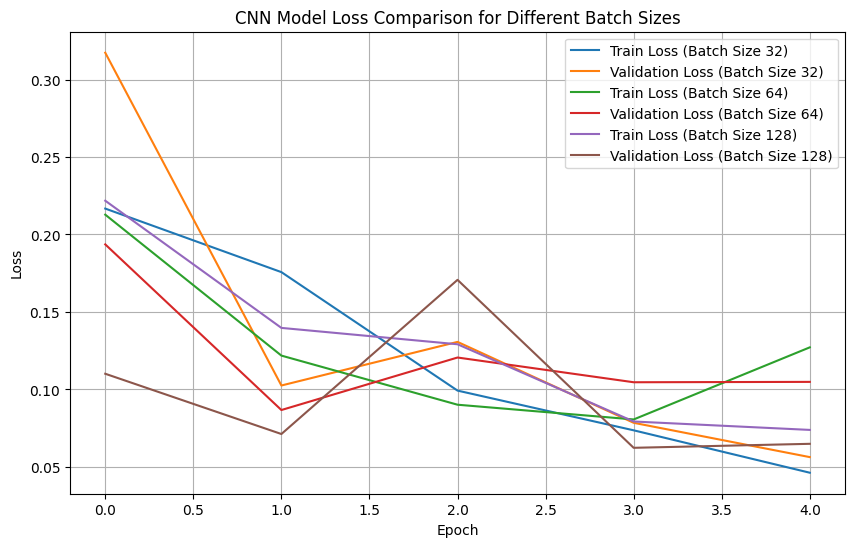

In [ ]:


# Plotting
plt.figure(figsize=(10, 6))

for i, batch_size in enumerate(batch_sizes):
    plt.plot(train_loss_list[i], label='Train Loss (Batch Size {})'.format(batch_size))
    plt.plot(val_loss_list[i], label='Validation Loss (Batch Size {})'.format(batch_size))

plt.title('CNN Model Loss Comparison for Different Batch Sizes')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import LSTM, Dense, Embedding, SpatialDropout1D
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Increase max_len to capture more context
max_len = 150

# Tokenize the text data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(data['text'])
X = tokenizer.texts_to_sequences(data['text'])
X_pad = pad_sequences(X, maxlen=max_len, padding='post')

# Define vocabulary size
num_words = len(tokenizer.word_index) + 1

# Split the data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_pad, data['target'], test_size=0.2, random_state=42)

# Define LSTM model
embedding_dim = 100  # Increased embedding dimension
lstm_units = 150  # Increased number of LSTM units



In [ ]:
from keras.layers import Conv1D, GlobalMaxPooling1D
batch_sizes = [32, 64, 128]
# Lists to store metrics for each batch size
cnn_train_loss_list = []
cnn_val_loss_list = []
cnn_train_accuracy_list = []
cnn_val_accuracy_list = []

for batch_size in batch_sizes:
    cnn_model = Sequential()
    cnn_model.add(Embedding(input_dim=num_words, output_dim=embedding_dim, input_length=max_len))
    cnn_model.add(Conv1D(filters=128, kernel_size=3, padding='valid', activation='relu'))
    cnn_model.add(GlobalMaxPooling1D())
    cnn_model.add(Dense(1, activation='sigmoid'))

    # Compile CNN model
    cnn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    # Print CNN model summary
    print("\nCNN Model Summary for Batch Size:", batch_size)
    cnn_model.summary()

    # Train CNN model
    cnn_history = cnn_model.fit(X_train, y_train, epochs=5, batch_size=batch_size, validation_data=(X_val, y_val))

    # Collecting metrics
    cnn_train_loss_list.append(cnn_history.history['loss'])
    cnn_val_loss_list.append(cnn_history.history['val_loss'])
    cnn_train_accuracy_list.append(cnn_history.history['accuracy'])
    cnn_val_accuracy_list.append(cnn_history.history['val_accuracy'])

    # Evaluate the CNN model on the validation set
    cnn_val_loss, cnn_val_accuracy = cnn_model.evaluate(X_val, y_val)
    print("\nValidation Accuracy for CNN with Batch Size {}: {}".format(batch_size, cnn_val_accuracy))

    # Predict on validation set
    cnn_y_pred = (cnn_model.predict(X_val) > 0.5).astype(int)
    print("Validation Accuracy (Binary) for CNN with Batch Size {}: {}".format(batch_size, accuracy_score(y_val, cnn_y_pred)))

    # Print classification report for CNN
    print("Classification Report for CNN with Batch Size {}: \n{}".format(batch_size, classification_report(y_val, cnn_y_pred)))





CNN Model Summary for Batch Size: 32
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 150, 100)          9595200   
                                                                 
 conv1d (Conv1D)             (None, 148, 128)          38528     
                                                                 
 global_max_pooling1d (Glob  (None, 128)               0         
 alMaxPooling1D)                                                 
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 9633857 (36.75 MB)
Trainable params: 9633857 (36.75 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/5
1106/1106 [=====================

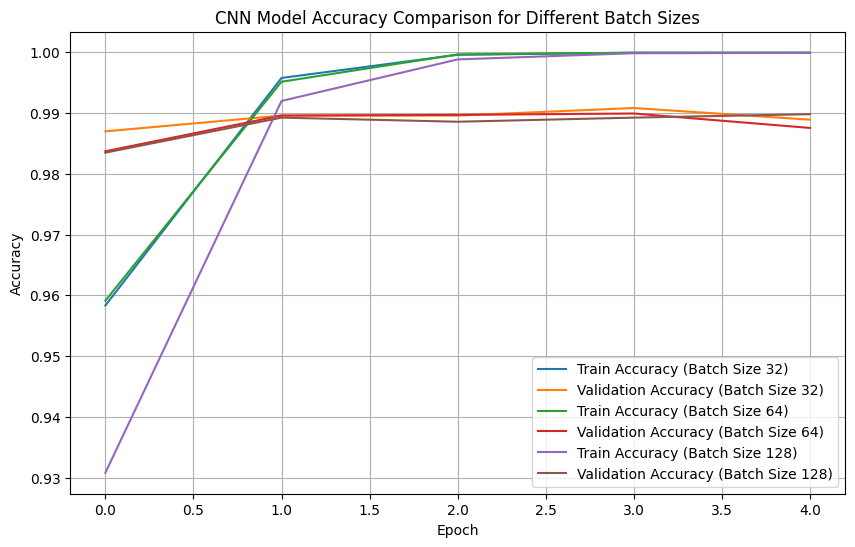

In [ ]:
import matplotlib.pyplot as plt

# Plotting
plt.figure(figsize=(10, 6))

for i, batch_size in enumerate(batch_sizes):
    plt.plot(cnn_train_accuracy_list[i], label='Train Accuracy (Batch Size {})'.format(batch_size))
    plt.plot(cnn_val_accuracy_list[i], label='Validation Accuracy (Batch Size {})'.format(batch_size))

plt.title('CNN Model Accuracy Comparison for Different Batch Sizes')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


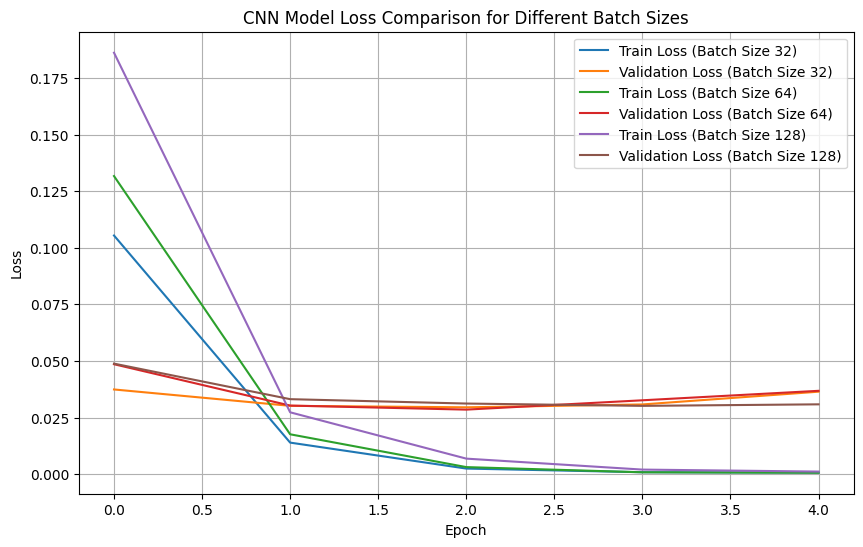

In [ ]:

# Plotting
plt.figure(figsize=(10, 6))

for i, batch_size in enumerate(batch_sizes):
    plt.plot(cnn_train_loss_list[i], label='Train Loss (Batch Size {})'.format(batch_size))
    plt.plot(cnn_val_loss_list[i], label='Validation Loss (Batch Size {})'.format(batch_size))

plt.title('CNN Model Loss Comparison for Different Batch Sizes')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()
